# ТЗ на позицию Продуктовый аналитик

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
columns = ["request","date","platform"]
df = pd.read_csv('data.tsv', sep='\t', names=columns)
df

,request,date,platform
0,малевич картины,1631806465,desktop
1,психология,1631781583,touch
2,с днём рождения лена,1631771563,touch
3,зверополис фильмы,1631787599,touch
4,алабай собака фото,1631786645,touch
...,...,...,...
1114360,бабочка,1631475653,touch
1114361,все республики россии,1631462934,touch
1114362,кухня в стиле лофт,1631432252,touch
1114363,топор,1631449347,desktop


In [26]:
df["date"] = pd.to_datetime(df["date"],unit="s")
df

,request,date,platform
0,малевич картины,2021-09-16 15:34:25,desktop
1,психология,2021-09-16 08:39:43,touch
2,с днём рождения лена,2021-09-16 05:52:43,touch
3,зверополис фильмы,2021-09-16 10:19:59,touch
4,алабай собака фото,2021-09-16 10:04:05,touch
...,...,...,...
1114360,бабочка,2021-09-12 19:40:53,touch
1114361,все республики россии,2021-09-12 16:08:54,touch
1114362,кухня в стиле лофт,2021-09-12 07:37:32,touch
1114363,топор,2021-09-12 12:22:27,desktop


In [29]:
df["date"].min()

Timestamp('2021-08-31 21:00:00')

In [30]:
df["date"].max()

Timestamp('2021-09-21 20:59:59')

Как мы видим диапазон дат заключен между 31 августа 21:00 и 21  сентября 20:59

Расчитаем колл-во запросов с тектом ютуб


In [48]:
yt2 = df.query('request.str.contains("ютуб")')
yt2.describe()
yt2

,request,date,platform
1937,ютуб,2021-09-10 10:16:12,desktop
2595,ютуб youtube,2021-09-19 07:22:25,touch
3204,ютуб,2021-09-14 03:55:12,touch
3633,ютуб,2021-09-14 14:00:21,desktop
4910,ютуб,2021-09-13 21:49:36,desktop
...,...,...,...
1111007,скачать видео с ютуба,2021-09-09 03:52:49,desktop
1111458,ютуб,2021-09-09 16:31:13,desktop
1112655,ютуб,2021-09-18 13:22:57,desktop
1112744,ютуб,2021-09-06 17:58:43,desktop


С помощью querry  и регулярного выражения мы рассчитали общее колл-во запросов с текстом "ютуб"
Теперь рассчитаем колл-во запросов по платформам

In [49]:
yt_touch = yt2[yt2["platform"] == "touch"]
yt_desktop = yt2[yt2["platform"] == "desktop"]
print(f"Колл-во запросов с текстом 'ютуб' на мобильных устройствах = {len(yt_touch)}")
print(f"Колл-во запросов с текстом 'ютуб' на  компьютерах = {len(yt_desktop)}")

Колл-во запросов с текстом 'ютуб' на мобильных устройствах = 597
Колл-во запросов с текстом 'ютуб' на  компьютерах = 802


Рассмотрим топ 10 запросов по платформам

In [57]:
touch = df[df["platform"] == "touch"]
desktop = df[df["platform"] == "desktop"]

touch["request"].value_counts()

request
с днём рождения женщине    4903
с днём рождения            3967
с днём рождения мужчине    3623
с днем рождения            3005
погода                     2840
                           ... 
здоровье с мамкой             1
эльза раскраска               1
животные на русском           1
музыка нагаторо               1
технологии с собаками         1
Name: count, Length: 31222, dtype: int64

На мобильных устройствах самые популярные запросы связаны с днями рождения и развлекательными темами

In [58]:
desktop["request"].value_counts()

request
календарь 2021            2804
таблица менделеева        2631
картинки                  1647
английский алфавит        1293
обои на рабочий стол      1143
                          ... 
фиксики технологии           1
самсунг а 50                 1
спираль внутриматочная       1
Аниме путешествия            1
королевский опенок           1
Name: count, Length: 24286, dtype: int64

 На компьютерах же темы запросов связаны с учебой и соц сетями.

Рассмотрим чем отличается трафик запросов в течении дня.
Возьмем определенный день для анализа

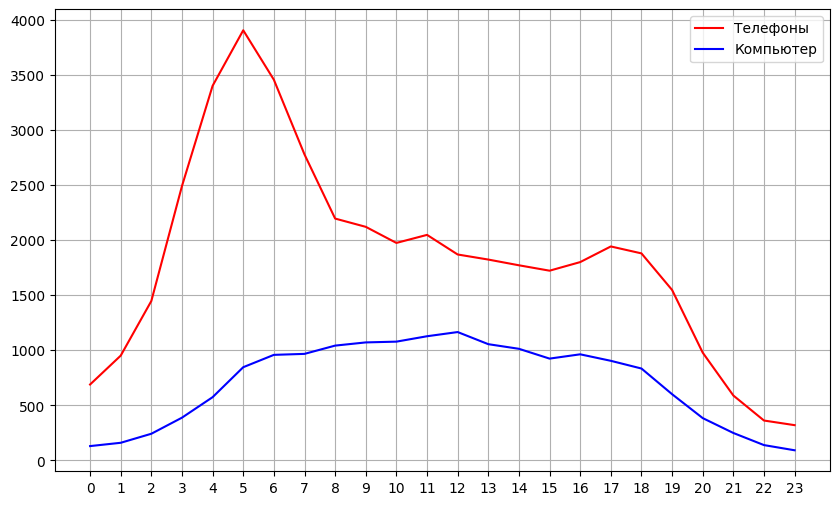

In [113]:
start_date = "2021-09-01 00:00:00"
end_date = "2021-09-01 23:59:59"

plt.figure(figsize=[10,6])

times_analysis_touch = touch[touch["date"].between(start_date, end_date,inclusive="both")]
hourly_data_touch = times_analysis_touch.groupby(times_analysis_touch['date'].dt.hour).size()
plt.plot(hourly_data_touch.index,hourly_data_touch.values,label='Телефоны',color='r')

times_analysis_desktop = desktop[desktop["date"].between(start_date, end_date,inclusive="both")]
hourly_data_desktop = times_analysis_desktop.groupby(times_analysis_desktop['date'].dt.hour).size()
plt.plot(hourly_data_desktop.index,hourly_data_desktop.values,label='Компьютер',color='b')

plt.xticks(hourly_data_desktop.index)
plt.legend()
plt.grid(True)
plt.show()

Как мы видим на графике  численность запросов на телефоне на пике в 5 часов, а на компьютере в 12. В общем кол-во запросов с телефонов больше чем с компьютеров.

In [116]:
touch["request"].value_counts()

request
с днём рождения женщине    4903
с днём рождения            3967
с днём рождения мужчине    3623
с днем рождения            3005
погода                     2840
                           ... 
здоровье с мамкой             1
эльза раскраска               1
животные на русском           1
музыка нагаторо               1
технологии с собаками         1
Name: count, Length: 31222, dtype: int64

На таблице видно что, самое большое кол-во запросов  на телефонах связано с поздравлениями. Остальные запросы связаны с тематикой развлечений. Также большое колл-во запросов связано с навигацией, например карты

In [117]:
desktop["request"].value_counts()

request
календарь 2021            2804
таблица менделеева        2631
картинки                  1647
английский алфавит        1293
обои на рабочий стол      1143
                          ... 
фиксики технологии           1
самсунг а 50                 1
спираль внутриматочная       1
Аниме путешествия            1
королевский опенок           1
Name: count, Length: 24286, dtype: int64

В запросах на компьютерах  мы видим что чаще всего ищут схемы или таблицы связанные с учебой и календари. Также много запросов на соц. сети и темы связанные с компьютером

Следовательно мы можем сделать вывод что на телефоных самые контрастные темы это темы, связанные со временем(поздравления и т.д.) и навигацией

На ПК больше контрастны темы, связанные с учебой и соц. сетей и компьютером